In [9]:
from IPython.display import Image

# Background

Data compression is an important topic of machine learning, as it allows us to analyse and interpret big amount of data. In ML, *feature extraction* techniques allows us to reduce the number of features in a dataset. Different from feature selection whchig maintain the original features, feature extraction transform or project the data onto new feature spaces.

Feature extraction improves the predictive performance of a given model by reducing the *curse of dimensionality*.
PCA finds correlation between the features by finding the directions of maximum variance in high-dimentional data and it projects the data onto a new subspace with equal or fewer dimensions. The ortogonal axes (principal components) of the new subspace should be interpreted as the directions of maximum variance given the constraint constraint that the new feature axes are ortogonal to each other [1].

Image(filename='images/GaussianScatterPCA.png')

Note that PCA directions are high sensitive to data scaling, thus the need to standardize the features prior to PCA.

As described in [1], The main steps behing PCA are:

1) Standardize the d-dimentional dataset
2) Construct the covariance matrix
3) Decompose the covariance matrix into its eigenvectors and eigenvalues
4) Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
5) Select k eigeinvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature space ($(k <= d))
6) Construct a projection matrix, W, from the top k eigenvectors.
7) Transform the d-dimensional input dataset, X, using the projection matrix W, to obtain the new k-dimensional feature space.




[1] Python Machine Learning - by Sebastian Raschka
[2] Python Machine Learning - Code Example Chapter 5 - https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch05/ch05.ipynb



In [2]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [3]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Lets split in training and testing dataset
from sklearn.model_selection import train_test_split

# First column - class label is the target
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

# 1) Standardize the d-dimentional dataset

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 2) Construct the covariance matrix
# 3) Decompose the covariance matrix into its eigenvectors and eigenvalues

    

In [12]:

import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


# 4) Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors

In [13]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

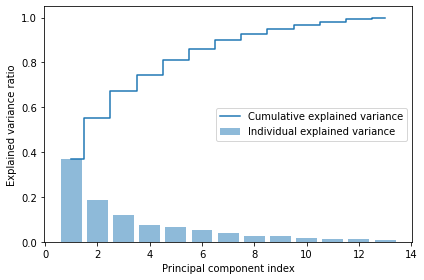

In [15]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

# 5) Select k eigeinvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature space ($(k <= d))

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# 6) Construct a projection matrix, W, from the top k eigenvectors.

In [18]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


# 7) Transform the d-dimensional input dataset, X, using the projection matrix W, to obtain the new k-dimensional feature space.

In [19]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

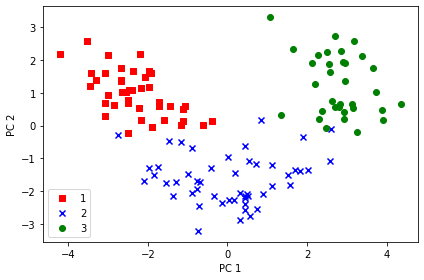

In [20]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

# Using PCA from SKlearn

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

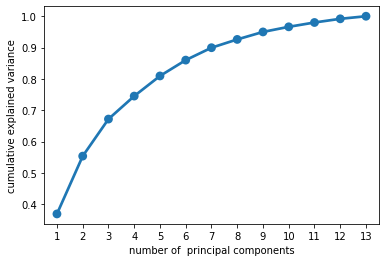

In [37]:
from sklearn.decomposition import PCA

# Instantiate PCA without specifying number of components
pca_all = PCA()

# Fit to scaled data
pca_all.fit(X_train_std)

# Save cumulative explained variance
cum_var = (np.cumsum(pca_all.explained_variance_ratio_))
n_comp = [i for i in range(1, pca_all.n_components_ + 1)]

# Plot cumulative variance
ax = sns.pointplot(x=n_comp, y=cum_var)
ax.set(xlabel='number of  principal components', ylabel='cumulative explained variance')
plt.show()

In [32]:
print(y_train)

[3 1 1 1 3 2 2 3 2 2 2 1 2 3 1 3 2 1 3 3 2 1 2 2 2 2 3 1 2 2 1 1 3 1 2 1 1
 2 3 3 1 3 3 3 1 2 3 3 2 3 2 2 2 1 2 2 3 3 2 1 1 2 3 3 2 1 2 2 2 1 1 1 1 1
 3 1 2 3 2 2 3 1 2 1 2 2 3 2 1 1 1 3 2 1 1 2 2 3 3 2 1 1 2 2 3 1 3 1 2 2 2
 2 1 3 1 1 1 1 2 2 3 3 2 2]


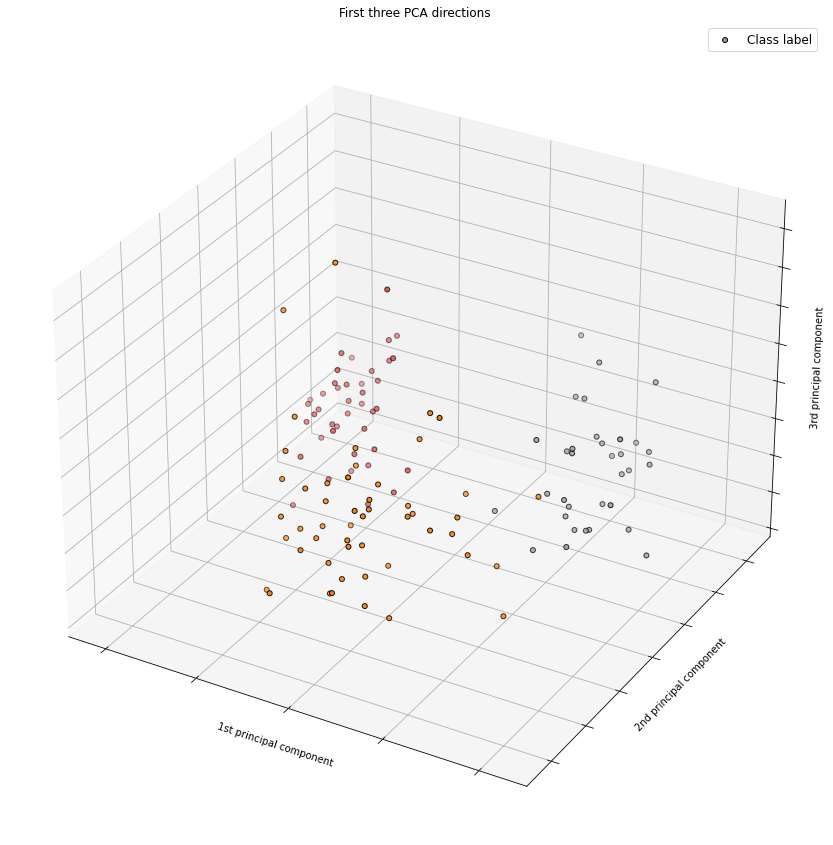

In [45]:
from mpl_toolkits.mplot3d import Axes3D

# Instantiate PCA with 3 components
pca_3 = PCA(3)

# Fit to scaled data
pca_3.fit(X_train_std)

# Transform scaled data
data_3pc = pca_3.transform(X_train_std)

# Render the 3D plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

labels = y_train

ax.scatter(data_3pc[:, 0], data_3pc[:, 1], data_3pc[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=25, label=df_wine['Class label'])

ax.legend(["Class label"], fontsize="large")

ax.set_title("First three PCA directions")
ax.set_xlabel("1st principal component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd principal component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd principal component")
ax.w_zaxis.set_ticklabels([])

plt.show()

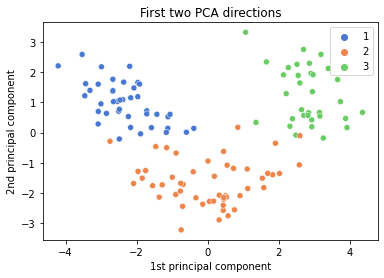

In [47]:
# Instantiate PCA with 2 components
pca_2 = PCA(2)

# Fit and transform scaled data
pca_2.fit(X_train_std)
data_2pc = pca_2.transform(X_train_std)

# Render the 2D plot
ax = sns.scatterplot(x=data_2pc[:,0], 
                     y=data_2pc[:,1], 
                     hue=labels,
                     palette=sns.color_palette("muted", n_colors=3))

ax.set(xlabel='1st principal component', ylabel='2nd principal component', title='First two PCA directions')
plt.show()